In [1]:
import seaborn as sns
import pandas as pd
from datetime import datetime as dt
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\aclark48\Desktop\DataScience1\Data files\compas.csv")

In [3]:
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

<AxesSubplot:xlabel='sex', ylabel='count'>

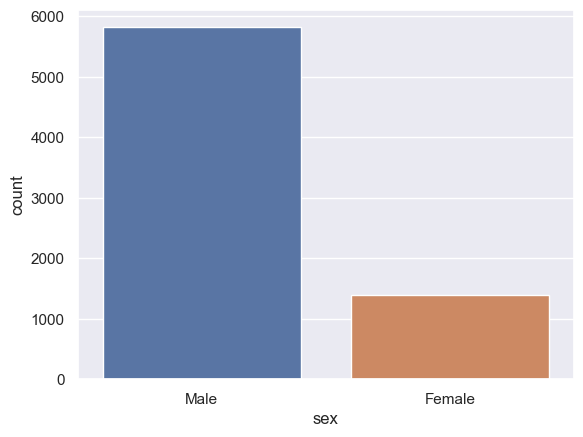

In [5]:
#Challenge 4
sns.set_theme(style="darkgrid")
sns.countplot(x=df["sex"])

<AxesSubplot:xlabel='age_cat', ylabel='count'>

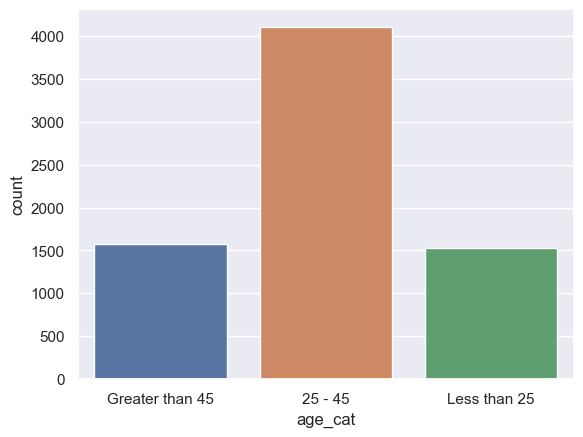

In [6]:
#Challenge 5
sns.set_theme(style="darkgrid")
sns.countplot(x=df["age_cat"])

<AxesSubplot:xlabel='age', ylabel='Count'>

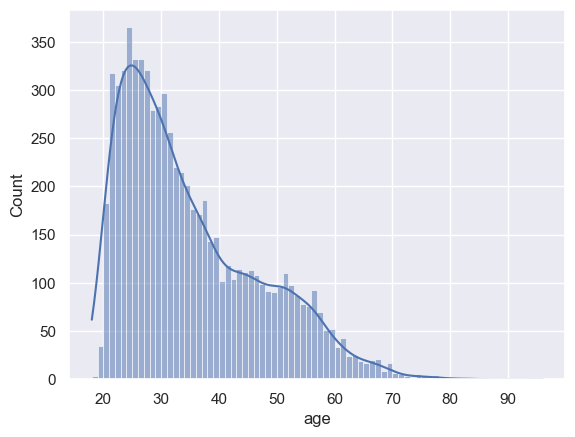

In [7]:
#Challenge 6
sns.histplot(data=df, x="age", kde = True, binwidth = 1)

<AxesSubplot:xlabel='age', ylabel='Count'>

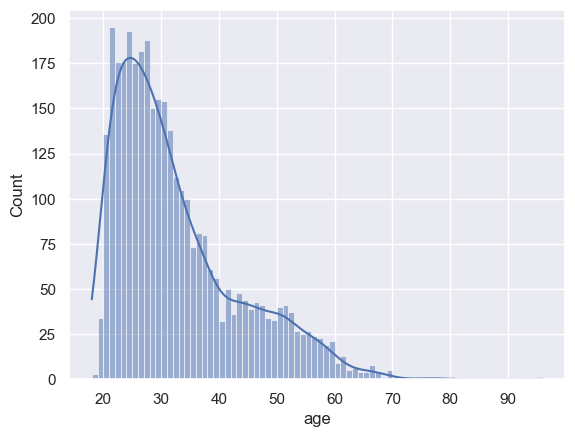

In [8]:
#Me challenge - success
#The age of reoffenders
recidData = df[df["is_recid"] == 1]
sns.histplot(recidData, x="age", kde = True, binwidth = 1)

In [9]:
#Challenge 7 attempt
#Jail in and out is stored in '4/13/2013  4:58:34 AM'
#2014-02-18

#date_string = "4/13/2013"
# date_format = "%Y-%m-%d"
# temp_df = df.dropna(subset=['c_jail_in'])
# for row in range(temp_df.shape[0]):
#     in_date_string = temp_df.iloc[row, 16].split()[0]
#     in_date = datetime.strptime(in_date_string, date_format)
    
#     out_date_string = temp_df.iloc[row, 17].split()[0]
#     out_date = datetime.strptime(out_date_string, date_format)
    
#     temp_df.loc[row, "days in jail"] = (out_date - in_date).days
# temp_df
# sns.scatterplot(data=df, y="age", x="days in jail")

<AxesSubplot:title={'center':'Jail Time After First Charge'}, xlabel='Days in Jail', ylabel='Age'>

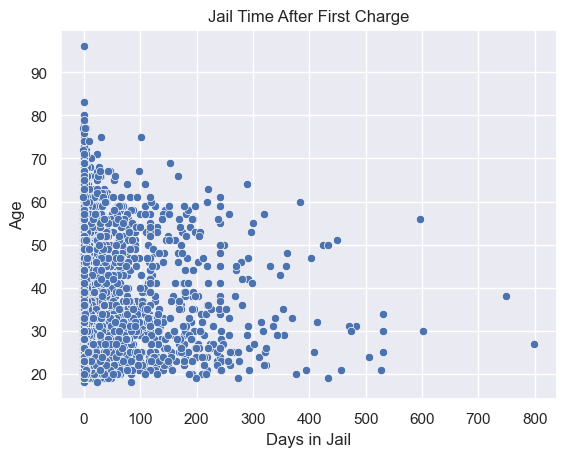

In [10]:
#Challenge 7 correct
df["c_jail_in"] = pd.to_datetime(df["c_jail_in"] )
df["c_jail_out"] = pd.to_datetime(df["c_jail_out"] )
df["days in jail"] = (df["c_jail_out"] - df["c_jail_in"]).dt.days
plt.xlabel("Days in Jail")
plt.ylabel("Age")
plt.title("Jail Time After First Charge")
sns.scatterplot(data=df, y="age", x="days in jail")

<AxesSubplot:xlabel='race', ylabel='count'>

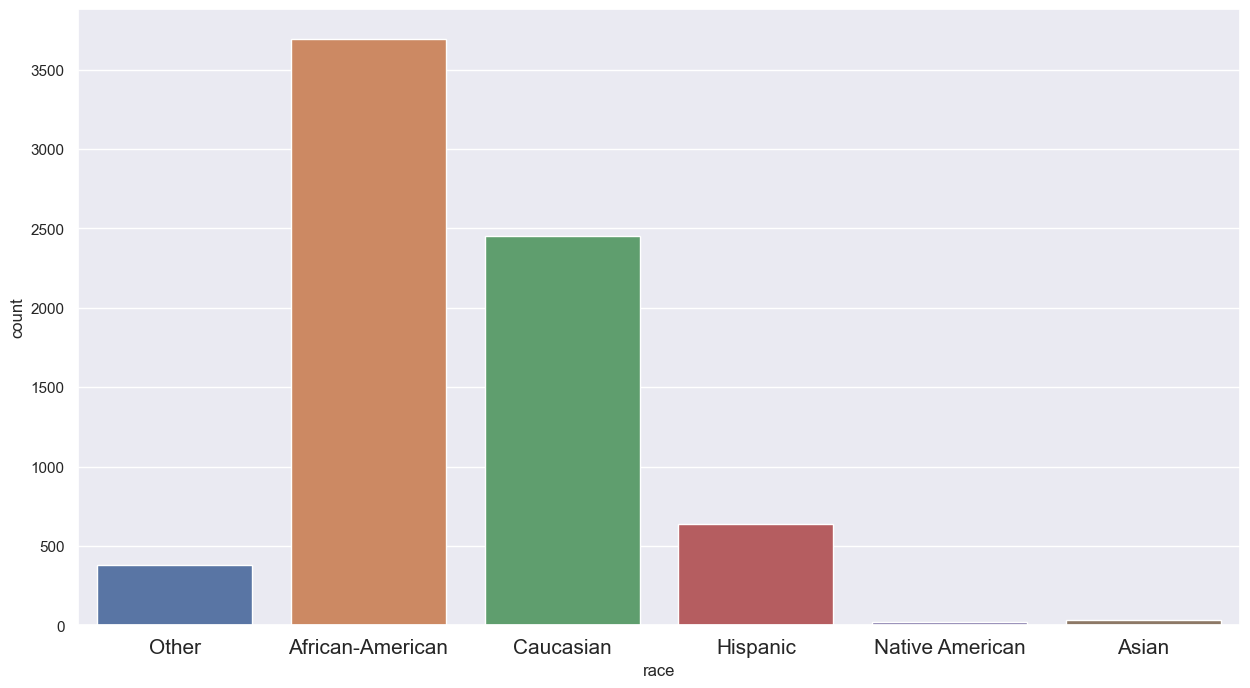

In [11]:
#Challenge 8
plt.figure(figsize=(15,8))
plt.xticks(fontsize = 15)
sns.countplot(x=df["race"])

<AxesSubplot:xlabel='decile_score', ylabel='count'>

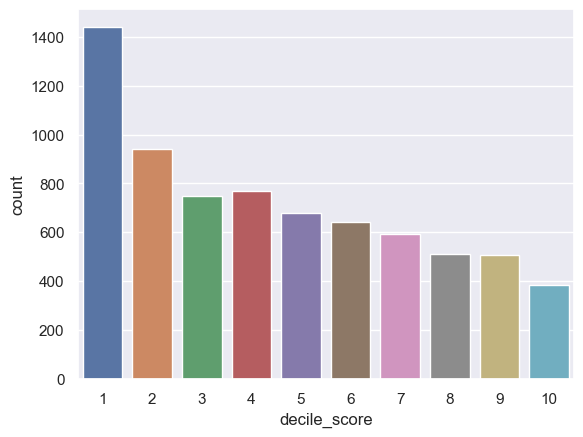

In [12]:
#Challenge 9
#I used a countplot because the different scores arn't continuous
sns.countplot(x=df["decile_score"])

In [13]:
#Challenge 9 pt2
df["decile_score"].value_counts()

1     1440
2      941
4      769
3      747
5      681
6      641
7      592
8      512
9      508
10     383
Name: decile_score, dtype: int64

<AxesSubplot:xlabel='decile_score', ylabel='count'>

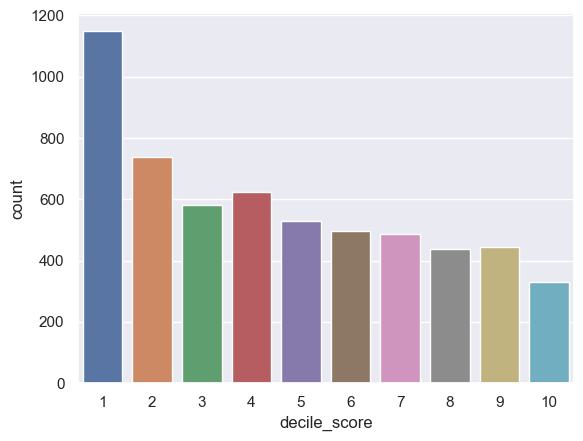

In [14]:
#Challenge 10 - Male
maledf = df[df["sex"] == "Male"]
sns.countplot(x=maledf["decile_score"])

<AxesSubplot:xlabel='decile_score', ylabel='count'>

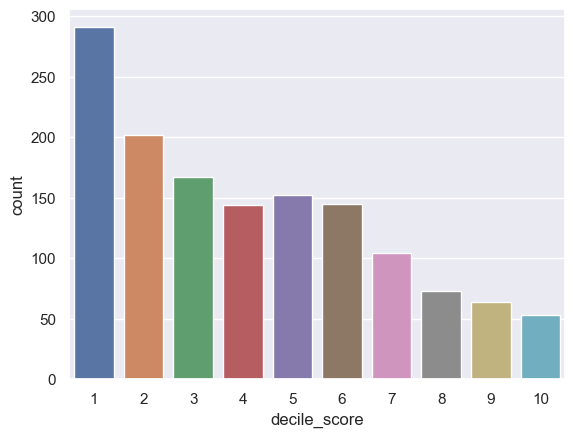

In [15]:
#Challenge 10 - Female
femaledf = df[df["sex"] == "Female"]
sns.countplot(x=femaledf["decile_score"])

In [16]:
#Me Challenge 2
#The percentages of data migh be better in this scnario(me speel god)
#tysm chatgpt
# male_df = df[df['sex'] == 'Male']
# female_df = df[df['sex'] == 'Female']

# # Group the data by the "score" column and calculate the percentage of males for each score
# male_score_percentages = (male_df['decile_score'].value_counts(normalize=True) * 100).reset_index(name='percentage')
# female_score_percentages = (female_df['decile_score'].value_counts(normalize=True) * 100).reset_index(name='percentage')
# fullData = {
#     'decile_score': male_score_percentages['index'],
#     'percent': male_score_percentages['percentage'],
#     'sex': female_score_percentages['percentage']
# }

# sns.barplot(data = fullData, x='male', y='decile_score', hue = 'female', palette='viridis')

<AxesSubplot:xlabel='decile_score', ylabel='count'>

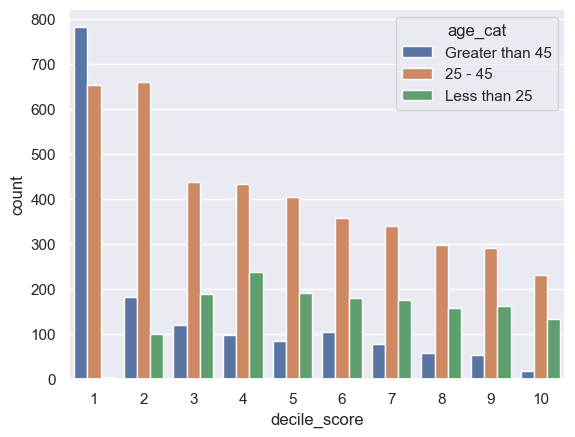

In [17]:
#Challenge 11
sns.countplot(x=df["decile_score"], hue=df["age_cat"])

<AxesSubplot:xlabel='decile_score', ylabel='count'>

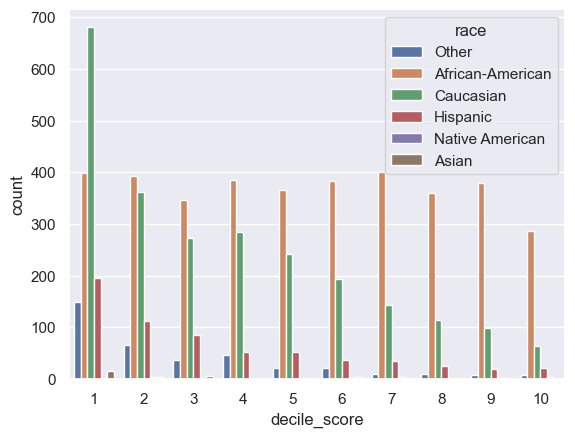

In [18]:
#challenge 12
sns.countplot(x=df["decile_score"], hue=df["race"])

<AxesSubplot:xlabel='decile_score', ylabel='days in jail'>

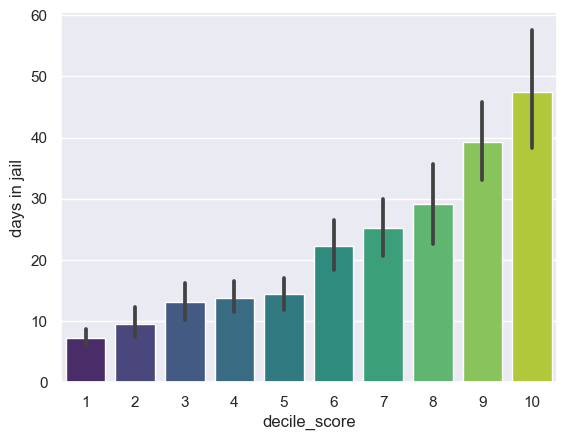

In [20]:
#challenge 13
sns.barplot(data=df, x="decile_score", y="days in jail", palette='viridis')

<AxesSubplot:xlabel='decile_score', ylabel='count'>

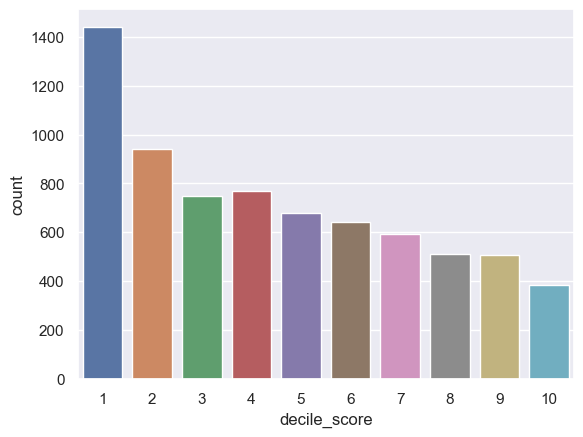

In [21]:
#graph repaste
sns.countplot(x=df["decile_score"])

In [ ]:
#challenge 14
#I need to make a graph that what percent of people in each score is a recid
percents = {
    'score': [1,2,3,4,5,6,7,8,9,10],
    ''
}
for i in range(10):
    tempdf = df[df["decile_score"] == i]
    value_count = df['two_year_recid'].eq(True).sum()
    total_count = len(df)
    percentage = (value_count / total_count) * 100